<!--
Pavel Prochazka 
pavel@prochazka.info
v0.2.0 18.12.2016
-->

# WNC Demodulation and Performance

Within this section, we bring ligth to the relay demodulator in WNC and complete the performance evaluation in the butterfly wireless network with the constellation design shown a section ago.

In [1]:
# Initialization
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##Relay Demodulator

The maximum likelihood decoder of the relay data is given by $d_R=\arg \max_{d_R} p(x_R|d_R).$ Using some assumptions, one can derive $$p(x_R|d_R) = \sum_{d_A, d_B: f(d_A,d_B)=d_R}p(x_R|d_A,d_B)$$ up to a scaling constant (check e.g. [1] for full detivation). Considering the Gaussian pdf, the likelihood becomes to
$$p(x_R|d_R) = \sum_{d_A, d_B: f(d_A,d_B)=d_R}\exp\left(-\frac{\left|x_R-\mathcal{M}_A(d_A)-h \mathcal{M}_B(d_B)\right|^2}{\sigma_{W_R}^2}\right).$$

One can see that minimum distance decision criterion used for visualization in the previous section is associated with approximation $$\sum_{d_A, d_B: f(d_A,d_B)=d_R}\exp\left(-\frac{\left|x_R-\mathcal{M}_A(d_A)-h \mathcal{M}_B(d_B)\right|^2}{\sigma_{W_R}^2}\right)\approx \max_{d_A, d_B: f(d_A,d_B)=d_R}\exp\left(-\frac{\left|x_R-\mathcal{M}_A(d_A)-h \mathcal{M}_B(d_B)\right|^2}{\sigma_{W_R}^2}\right).$$ Within this tutorial, this approximation will be used for visualizations, nevertheless the error rate is evaluated upon true metric.

Other links within the network (that is side and relay to destination links) are point to point and thus minimum distance decision criterion is equal to maximum likelihood estimator as in conventional communication theory.

## SNR Visualization

We show a rough, but very simple and ilustrative visualization of the system channel links quality given by signal to noise ratio (SNR or $\gamma$) that is unambiguously related to variance of the Gaussian noise ($\sigma_W^2$), since unit power restriction is assumed in all transmiting nodes.

We therefore consider a semidiameter $d$ with interpretation that the $\mathrm{Pr}(|w|>d) = P_e$ for given probability $P_e$ and zero mean AWGN ($w$). The idea is that if the circle is inside the corresponding decision region, the probability of error is very small as $P_e$ is small. We stress that we are not developing an alternative way how to evaluate the error rate, like pairwise approaximation. The intention is just to visualize the SNRs of the links with respect to the decision regions.



The semidiameter $d$ as a function of $P_e$ and $\sigma_W^2$ is given by $$d=\sqrt{-\sigma_W^2 \log(P_e)}$$ as $|w|$ obbeys the Raygleigh distribution. Considering zero mean AWGN for demonstration:

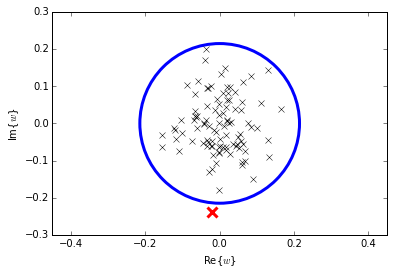

In [2]:
from matplotlib.patches import Polygon, Circle
fig, ax = plt.subplots() 
ax.axis('equal')

Pe = 1e-2
L = 100
sigma2w = 0.01
d = np.sqrt(-sigma2w*np.log(Pe))
c = plt.Circle((0, 0), d, color='blue',fill=None, lw=3)
ax.add_artist(c)
# Gaussian noise generation
w = np.sqrt(sigma2w/2) * (np.random.randn(L) + 1j * np.random.randn(L))
ax.plot(np.real(w[np.abs(w)<d]), np.imag(w[np.abs(w)<d]), 'kx')
ax.plot(np.real(w[np.abs(w)>=d]), np.imag(w[np.abs(w)>=d]), 'rx', ms=10,mew=3)
ax.set_xlabel('Re{$w$}')
ax.set_ylabel('Im{$w$}')

The crosses denote the random noise instances (their vast majority should be inside the circle). Note that the received signal can be drawn similarly with mean placed in the constellation points. Our convention is to denote the circle by green color if it is inside decision region and by red color otherwise.

##Visualization of SNR in Received Constellations

Let apply the proposed tool for the constellation design in the butterfly network:

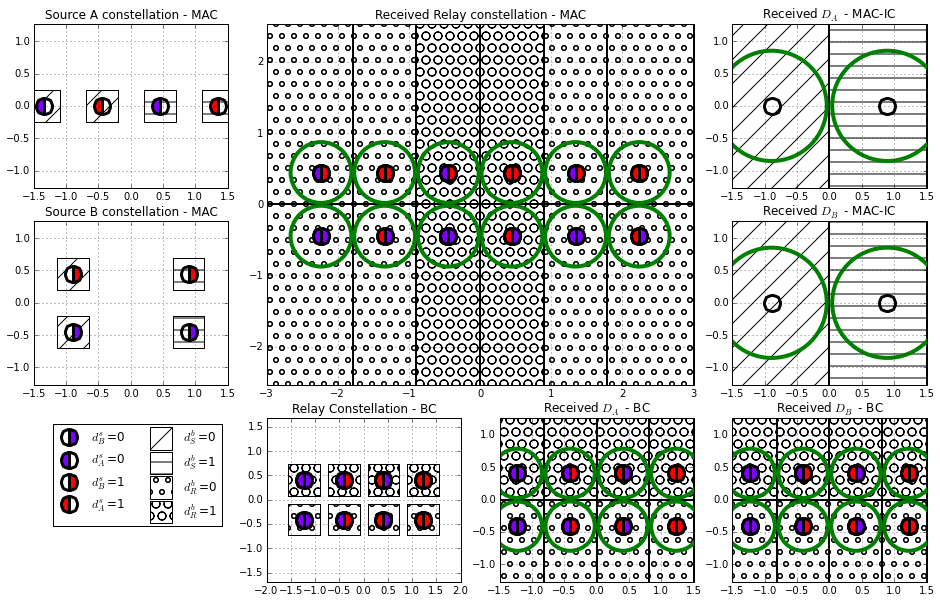

In [3]:
from Constellation_Design_lib import draw_Constellations_IC_withErrCirc
Nb = 1
Ns = 1
h = 1. 
gMAC = 18 
gBC = 19 
gHSI = 12
draw_Constellations_IC_withErrCirc(Nb, Ns, h, gMAC, gBC, gHSI)

It should be noted that these circles are only approaximation in the received relay constellation, because of many to one mapping. As it can be seen in the Figure above, we can expect that all received points are within the correct decision region and thus low error rate can be expected for given tupple of SNR values. Using this visualization technique, one can find out that side links are efficiently utilized, because neither ($N_b=2, N_s=0$) nor ($N_b=0, N_s=2$) could work so well in this case. The first one due to the insufficient strength of site link and the latter due to the insufficient strength of the relay to destination link as on can see in the following plots:

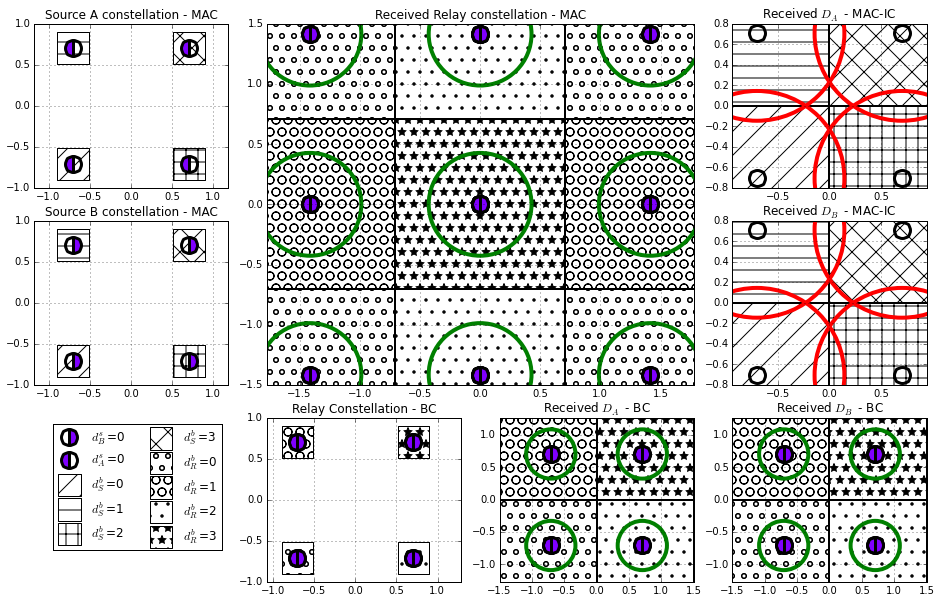

In [4]:
# Pure wireless network coding (insufficient site link strength)
Nb = 2
Ns = 0
draw_Constellations_IC_withErrCirc(Nb, Ns, h, gMAC, gBC, gHSI)

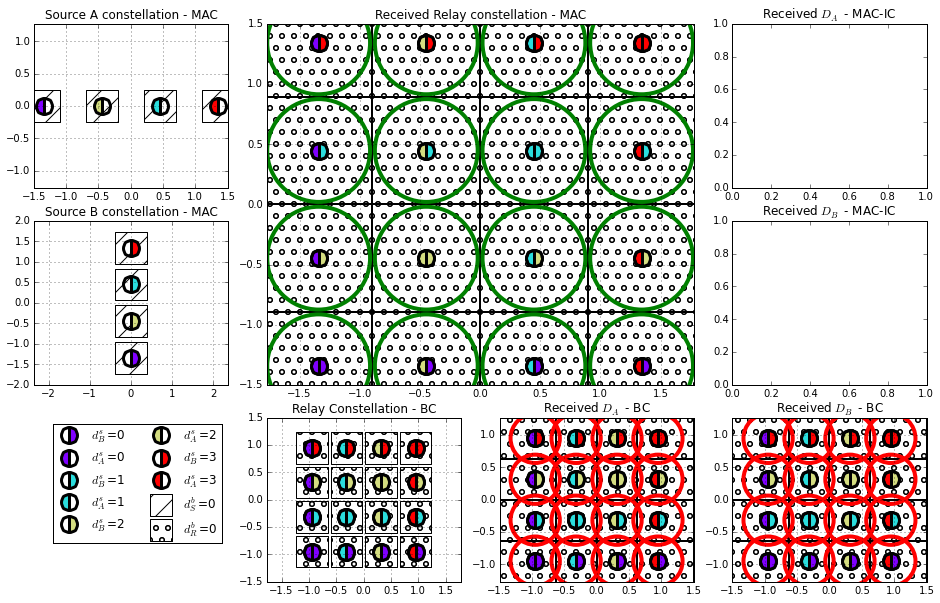

In [5]:
# Routing - (insufficient relay to destinations link strength)
Nb = 0
Ns = 2
draw_Constellations_IC_withErrCirc(Nb, Ns, h, gMAC, gBC, gHSI)

##References:

<tr valign="top"> 
<td align="right" class="bibtexnumber">
[<a name="Sykora-Burr_2011-TVT">1</a>]
</td>
<td class="bibtexitem">
Jan Sykora and Alister Burr.
 Layered design of hierarchical exclusive codebook and its capacity
  regions for HDF strategy in parametric wireless 2-WRC.
 <em>IEEE Trans. Veh. Technol.</em>, 60(7):3241--3252, sep 2011.


</td>
</tr>
